In [3]:
import os
import requests

#Get the pdf Document PATH
pdf_path="Computer-Vision-Algorithm-and-Applications.pdf"

if not os.path.exists(pdf_path):
    print("[INFO] File does not exists. downloading....")

    url="https://vim.ustc.edu.cn/_upload/article/files/d4/87/71e9467745a5a7b8e80e94007d1b/4cd69b21-85d3-43ba-9935-fd9ae33da82b.pdf"

    filename=pdf_path

    response=requests.get(url)

    if response.status_code==200:
        with open(filename,"wb") as file:
            file.write(response.content)
        print(f"[INFO] File has been  downloaded and saved as {filename}")
    else:
        print(f"[INFO] Failed to download the file. Status code: {response.status_code}")

else:
    print(f"File {pdf_path} exists")



File Computer-Vision-Algorithm-and-Applications.pdf exists


In [4]:
!pip install pymupdf

In [5]:
import pymupdf
from tqdm.auto import tqdm

def text_formatter(text:str) -> str:
    cleaned_text=text.replace("\n"," ").strip()
    return cleaned_text

def open_and_read_pdf(pdf_path:str) -> list[dict]:
    doc=pymupdf.open(pdf_path)
    pages_and_text=[]

    for page_number,page in tqdm(enumerate(doc)):
        text=page.get_text()
        text=text_formatter(text)

        pages_and_text.append({
                                "page_number":page_number-22,
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text)/4,
                                "text": text
        })

    return pages_and_text

pages_and_text=open_and_read_pdf(pdf_path=pdf_path)
pages_and_text[:2]



0it [00:00, ?it/s]

[{'page_number': -22,
  'page_char_count': 300,
  'page_word_count': 43,
  'page_sentence_count_raw': 2,
  'page_token_count': 75.0,
  'text': 'Computer Vision: Algorithms and Applications Richard Szeliski August 18, 2010 draft c⃝2010 Springer This electronic draft is for non-commercial personal use only, and may not be posted or re-distributed in any form. Please refer interested readers to the book’s Web site at http://szeliski.org/Book/.'},
 {'page_number': -21,
  'page_char_count': 71,
  'page_word_count': 10,
  'page_sentence_count_raw': 1,
  'page_token_count': 17.75,
  'text': 'ii Computer Vision: Algorithms and Applications (August 18, 2010 draft)'}]

In [6]:
import random

random.sample(pages_and_text,k=3)

[{'page_number': 376,
  'page_char_count': 2730,
  'page_word_count': 404,
  'page_sentence_count_raw': 16,
  'page_token_count': 682.5,
  'text': '7.6 Additional reading 377 7.6 Additional reading The topic of structure from motion is extensively covered in books and review articles on multi-view geometry (Faugeras and Luong 2001; Hartley and Zisserman 2004; Moons, Van Gool, and Vergauwen 2010). For two-frame reconstruction, Hartley (1997a) wrote a highly cited paper on the “eight-point algorithm” for computing an essential or fundamental ma- trix with reasonable point normalization. When the cameras are calibrated, the ﬁve-point algorithm of Nist´er (2004) can be used in conjunction with RANSAC to obtain initial recon- structions from the minimum number of points. When the cameras are uncalibrated, various self-calibration techniques can be found in work by Hartley and Zisserman (2004); Moons, Van Gool, and Vergauwen (2010)—I only brieﬂy mention one of the simplest techniques, the Kr

In [7]:
import pandas as pd

df=pd.DataFrame(pages_and_text)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-22,300,43,2,75.00,Computer Vision: Algorithms and Applications R...
1,-21,71,10,1,17.75,ii Computer Vision: Algorithms and Application...
2,-20,98,17,1,24.50,"This book is dedicated to my parents, Zdzisław..."
3,-19,874,136,1,218.50,1 Introduction 1 What is computer vision? • A ...
4,-18,1063,151,1,265.75,8 Dense motion estimation 381 Translational al...


In [8]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,979.00,979.00,979.00,979.00,979.00
mean,467.00,2129.44,345.65,38.02,532.36
std,282.76,688.35,132.74,105.53,172.09
min,-22.00,71.00,10.00,1.00,17.75
25%,222.50,1827.00,297.00,11.00,456.75
50%,467.00,2247.00,347.00,15.00,561.75
75%,711.50,2536.00,411.50,21.00,634.00
max,956.00,3456.00,1262.00,1103.00,864.00


In [9]:
from spacy.lang.en import English

nlp=English()

nlp.add_pipe("sentencizer")

doc=nlp("This is a sentence. This is a another sentence., I like elephants")

assert len(list(doc.sents))==3

list(doc.sents)

[This is a sentence., This is a another sentence.,, I like elephants]

In [10]:
for item in tqdm(pages_and_text):
    item["sentences"]=list(nlp(item["text"]).sents)

    item["sentences"]=[str(sentence) for sentence in item["sentences"]]

    item["page_sentence_count_spacy"]=len(item["sentences"])


  0%|          | 0/979 [00:00<?, ?it/s]

In [11]:
random.sample(pages_and_text,k=1)

[{'page_number': 298,
  'page_char_count': 365,
  'page_word_count': 54,
  'page_sentence_count_raw': 4,
  'page_token_count': 91.25,
  'text': '5.4 Normalized cuts 299 Figure 5.21 Normalized cuts segmentation (Shi and Malik 2000) c⃝2000 IEEE: The input image and the components returned by the normalized cuts algorithm. Figure 5.22 Comparative segmentation results (Alpert, Galun, Basri et al. 2007) c⃝2007 IEEE. “Our method” refers to the probabilistic bottom-up merging algorithm developed by Alpert et al.',
  'sentences': ['5.4 Normalized cuts 299 Figure 5.21 Normalized cuts segmentation (Shi and Malik 2000) c⃝2000 IEEE: The input image and the components returned by the normalized cuts algorithm.',
   'Figure 5.22 Comparative segmentation results (Alpert, Galun, Basri et al.',
   '2007) c⃝2007 IEEE. “',
   'Our method” refers to the probabilistic bottom-up merging algorithm developed by Alpert et al.'],
  'page_sentence_count_spacy': 4}]

In [12]:
df=pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,979.00,979.00,979.00,979.00,979.00,979.00
mean,467.00,2129.44,345.65,38.02,532.36,18.26
std,282.76,688.35,132.74,105.53,172.09,12.92
min,-22.00,71.00,10.00,1.00,17.75,1.00
25%,222.50,1827.00,297.00,11.00,456.75,11.00
50%,467.00,2247.00,347.00,15.00,561.75,15.00
75%,711.50,2536.00,411.50,21.00,634.00,21.00
max,956.00,3456.00,1262.00,1103.00,864.00,54.00


#Chunking our sentences together

In [13]:
num_sentence_chunk_size=10

def split_list(input_list=list[str],slice_size=num_sentence_chunk_size) -> list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0,len(input_list),slice_size)]

test_list=list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [14]:
for item in tqdm(pages_and_text):
    item["sentence_chunks"]=split_list(input_list=item["sentences"],
                                       slice_size=num_sentence_chunk_size)

    item["num_chunks"]=len(item["sentence_chunks"])

  0%|          | 0/979 [00:00<?, ?it/s]

In [15]:
random.sample(pages_and_text,k=1)

[{'page_number': 127,
  'page_char_count': 1846,
  'page_word_count': 322,
  'page_sentence_count_raw': 12,
  'page_token_count': 461.5,
  'text': '128 Computer Vision: Algorithms and Applications (August 18, 2010 draft) (a) (b) (c) (d) (e) (f) Figure 3.21 Binary image morphology: (a) original image; (b) dilation; (c) erosion; (d) majority; (e) opening; (f) closing. The structuring element for all examples is a 5 × 5 square. The effects of majority are a subtle rounding of sharp corners. Opening fails to eliminate the dot, since it is not wide enough. operation, θ(f, c) = ( 1 if f ≥c, 0 else, (3.41) e.g., converting a scanned grayscale document into a binary image for further processing such as optical character recognition. The most common binary image operations are called morphological operations, since they change the shape of the underlying binary objects (Ritter and Wilson 2000, Chapter 7). To perform such an operation, we ﬁrst convolve the binary image with a binary structuring 

In [16]:
df=pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,979.00,979.00,979.00,979.00,979.00,979.00,979.00
mean,467.00,2129.44,345.65,38.02,532.36,18.26,2.31
std,282.76,688.35,132.74,105.53,172.09,12.92,1.27
min,-22.00,71.00,10.00,1.00,17.75,1.00,1.00
25%,222.50,1827.00,297.00,11.00,456.75,11.00,2.00
50%,467.00,2247.00,347.00,15.00,561.75,15.00,2.00
75%,711.50,2536.00,411.50,21.00,634.00,21.00,3.00
max,956.00,3456.00,1262.00,1103.00,864.00,54.00,6.00


# Splitting  each chunks into its own item

import re

In [17]:
import re



pages_and_chunks=[]
for item in tqdm(pages_and_text):
    for sentence_chunk in item["sentence_chunks"]:

        chunk_dict={}
        chunk_dict["page_number"]=item["page_number"]

        #join the sentences into paragraph like strucutr a.k.a join the lists of sentence into one single paragraph
        joined_sentence_chunk="".join(sentence_chunk).replace("  "," ").strip()
        joined_sentence_chunk=re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)

        chunk_dict["sentence_chunk"]=joined_sentence_chunk

        chunk_dict["chunk_char_count"]=len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"]=len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"]=len(joined_sentence_chunk)/4

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)



  0%|          | 0/979 [00:00<?, ?it/s]

2263

In [18]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 884,
  'sentence_chunk': 'Rehg, J. and Witkin, A. (1991). Visual tracking with deformation models. In IEEE Inter- national Conference on Robotics and Automation, pp.844–850, Sacramento. Rehg, J., Morris, D. D., and Kanade, T. (2003). Ambiguities in visual tracking of ar- ticulated objects using two- and three-dimensional models. International Journal of Robotics Research, 22(6):393–418.',
  'chunk_char_count': 363,
  'chunk_word_count': 50,
  'chunk_token_count': 90.75}]

In [19]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,2263.00,2263.00,2263.00,2263.00
mean,537.07,919.16,148.04,229.79
std,297.10,583.89,99.68,145.97
min,-22.00,3.00,1.00,0.75
25%,274.50,472.00,67.00,118.00
50%,576.00,708.00,112.00,177.00
75%,822.00,1410.00,232.50,352.50
max,956.00,3367.00,497.00,841.75


In [20]:
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,-22,Computer Vision: Algorithms and Applications R...,300,43,75.00
1,-21,ii Computer Vision: Algorithms and Application...,71,10,17.75
2,-20,"This book is dedicated to my parents, Zdzisław...",98,17,24.50
3,-19,1 Introduction 1 What is computer vision? •A b...,873,135,218.25
4,-18,8 Dense motion estimation 381 Translational al...,1063,151,265.75


In [21]:
min_token_length=30

for row in df[df["chunk_token_count"]<=min_token_length].sample(5).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text:  {row[1]["sentence_chunk"]}')

Chunk token count: 26.25 | Text:  Geller, T. (2008). Overcoming the uncanny valley. IEEE Computer Graphics and Applica- tions, 28(4):11–17.
Chunk token count: 29.5 | Text:  This kind of active illu- mination has been used from the earliest days of machine vision to construct highly reliable
Chunk token count: 9.25 | Text:  http://www.cs.unc.edu/∼ccwu/siftgpu/.
Chunk token count: 18.0 | Text:  730 Computer Vision: Algorithms and Applications (August 18, 2010 draft)
Chunk token count: 18.0 | Text:  Can you think of some extensions or modiﬁcations to make it even better?


In [22]:
pages_and_chunks_over_min_token_len=df[df["chunk_token_count"]>min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -22,
  'sentence_chunk': 'Computer Vision: Algorithms and Applications Richard Szeliski August 18, 2010 draft c⃝2010 Springer This electronic draft is for non-commercial personal use only, and may not be posted or re-distributed in any form. Please refer interested readers to the book’s Web site at http://szeliski.org/Book/.',
  'chunk_char_count': 300,
  'chunk_word_count': 43,
  'chunk_token_count': 75.0},
 {'page_number': -19,
  'sentence_chunk': '1 Introduction 1 What is computer vision? •A brief history • Book overview • Sample syllabus • Notation n^ 2 Image formation 29 Geometric primitives and transformations • Photometric image formation • The digital camera 3 Image processing 99 Point operators • Linear ﬁltering • More neighborhood operators • Fourier transforms • Pyramids and wavelets • Geometric transformations • Global optimization 4 Feature detection and matching 205 Points and patches • Edges • Lines 5 Segmentation 267 Active contours • Split and merge • 

In [23]:
random.sample(pages_and_chunks_over_min_token_len, k=1)


[{'page_number': 772,
  'sentence_chunk': 'B.5 Markov random ﬁelds 773 (a) initial labeling (b) standard move (c) α-β-swap (d) α-expansion Figure B.4 Multi-level graph optimization from (Boykov, Veksler, and Zabih 2001) c⃝2001 IEEE: (a) initial problem conﬁguration; (b) the standard move changes only one pixel; (c) the α–β-swap optimally exchanges all α- and β-labeled pixels; (d) the α-expansion move optimally selects among current pixel values and the α label. (Alahari, Kohli, and Torr 2011), and a forthcoming book (Blake, Kohli, and Rother 2010). B.5.5 Linear programming 8 Many successful algorithms for MRF optimization are based on the linear programming (LP) relaxation of the energy function (Weiss, Yanover, and Meltzer 2010). For some prac- tical MRF problems, LP-based techniques can produce globally minimal solutions (Meltzer, Yanover, and Weiss 2005), even though MRF inference is in general NP-hard. In order to describe this relaxation, let us ﬁrst rewrite the energy function (B

# Embedding our text chunks

In [24]:
from sentence_transformers import SentenceTransformer
embedding_model=SentenceTransformer(model_name_or_path="all-mpnet-base-v2",device="cpu")

sentences = ["The Sentence Transformer library provides an easy way to create embeddings.",
             "Sentences can be embedded one by one or in a list.",
             "I like horses!"]

embeddings=embedding_model.encode(sentences)
embedding_dict=dict(zip(sentences,embeddings))

for sentence,embedding in embedding_dict.items():
    print(f"Sentence: {sentence}")
    print(f"Embedding: {embedding}")
    print("")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Sentence: The Sentence Transformer library provides an easy way to create embeddings.
Embedding: [-3.44285965e-02  2.95328815e-02 -2.33643427e-02  5.57256676e-02
 -2.19097901e-02 -6.47064112e-03  1.02849239e-02 -6.57803640e-02
  2.29718629e-02 -2.61120293e-02  3.80421206e-02  5.61401807e-02
 -3.68746519e-02  1.52788106e-02  4.37020883e-02 -5.19723147e-02
  4.89480123e-02  3.58105847e-03 -1.29750445e-02  3.54382629e-03
  4.23262045e-02  3.52606773e-02  2.49402337e-02  2.99177021e-02
 -1.99382510e-02 -2.39752755e-02 -3.33376741e-03 -4.30450141e-02
  5.72013706e-02 -1.32518290e-02 -3.54477763e-02 -1.13935880e-02
  5.55561110e-02  3.61092575e-03  8.88527154e-07  1.14027113e-02
 -3.82229537e-02 -2.43547955e-03  1.51314056e-02 -1.32618807e-04
  5.00659384e-02 -5.50876446e-02  1.73444580e-02  5.00958525e-02
 -3.75958979e-02 -1.04463184e-02  5.08322865e-02  1.24861244e-02
  8.67376477e-02  4.64142635e-02 -2.10690089e-02 -3.90251316e-02
  1.99695048e-03 -1.42345959e-02 -1.86795499e-02  2.826697

In [25]:
embeddings[0].shape


(768,)

In [26]:
embedding = embedding_model.encode("My favourite animal is the cow!")
embedding

array([-1.45473080e-02,  7.66727030e-02, -2.85872333e-02, -3.31283323e-02,
        3.65210772e-02,  4.78570387e-02, -7.08107278e-02,  1.62833966e-02,
        1.93444025e-02, -2.80481875e-02, -2.91746892e-02,  5.11309765e-02,
       -3.28720659e-02, -8.98753200e-03, -1.03672538e-02, -3.15488167e-02,
        4.22784276e-02, -9.13280062e-03, -1.94016788e-02,  4.35689203e-02,
       -2.31997799e-02,  4.29883450e-02, -1.72393303e-02, -2.01372430e-02,
       -3.13574187e-02,  8.08169041e-03, -2.06725001e-02, -2.27869172e-02,
        2.44812649e-02,  1.71968360e-02, -6.26673177e-02, -7.54796788e-02,
        3.57421897e-02, -5.46572218e-03,  1.24730332e-06, -7.63203809e-03,
       -3.53222564e-02,  1.91327073e-02,  3.99044976e-02,  2.11736304e-03,
        1.64565779e-02,  9.84051824e-03, -1.80700365e-02,  9.33830347e-03,
        3.23483013e-02,  5.84785640e-02,  4.23187129e-02,  1.62091721e-02,
       -9.14911777e-02,  1.82305146e-02, -5.25731966e-03, -7.81017030e-03,
       -3.47644053e-02, -

In [27]:
%%time

embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/2183 [00:00<?, ?it/s]

CPU times: user 49.4 s, sys: 844 ms, total: 50.2 s
Wall time: 52.1 s


In [28]:
%%time

text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[419]

CPU times: user 774 µs, sys: 0 ns, total: 774 µs
Wall time: 781 µs


'Chapter 4 Feature detection and matching 4.1 Points and patches . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .207 4.1.1 Feature detectors . . . . . . . . . . . . . . . . . . . . . . . . . . . .209 4.1.2 Feature descriptors . . . . . . . . . . . . . . . . . . . . . . . . . . .222 4.1.3 Feature matching . . . . . . . . . . . . . . . . . . . . . . . . . . . .225 4.1.4 Feature tracking . . . . . . . . . . . . . . . . . . . . . . . . . . . .235 4.1.5 Application: Performance-driven animation . . . . . . . . . . . . . .237 4.2 Edges . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .238 4.2.1 Edge detection . . . . . . . . . . . . . . . . . . . . . . . . . . . . .238 4.2.2 Edge linking . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .244 4.2.3 Application: Edge editing and enhancement . . . . . . . . . . . . . .'

In [29]:
len(text_chunks)

2183

In [30]:
%%time

text_chunk_embeddings=embedding_model.encode(text_chunks,batch_size=32,convert_to_tensor=True)

text_chunk_embeddings

CPU times: user 36 s, sys: 82.4 ms, total: 36 s
Wall time: 36.8 s


tensor([[-0.0390, -0.0021,  0.0009,  ...,  0.0198,  0.0144,  0.0088],
        [-0.0473, -0.0102,  0.0155,  ..., -0.0096,  0.0199,  0.0011],
        [-0.0392,  0.0192,  0.0561,  ..., -0.0145, -0.0022,  0.0260],
        ...,
        [ 0.0042, -0.0313,  0.0011,  ..., -0.0160, -0.0074, -0.0355],
        [ 0.0165, -0.0127, -0.0178,  ..., -0.0158,  0.0080, -0.0197],
        [-0.0697, -0.0370,  0.0121,  ..., -0.0068, -0.0325, -0.0116]],
       device='cuda:0')

In [31]:
pages_and_chunks_over_min_token_len[419]


{'page_number': 204,
 'sentence_chunk': 'Chapter 4 Feature detection and matching 4.1 Points and patches . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .207 4.1.1 Feature detectors . . . . . . . . . . . . . . . . . . . . . . . . . . . .209 4.1.2 Feature descriptors . . . . . . . . . . . . . . . . . . . . . . . . . . .222 4.1.3 Feature matching . . . . . . . . . . . . . . . . . . . . . . . . . . . .225 4.1.4 Feature tracking . . . . . . . . . . . . . . . . . . . . . . . . . . . .235 4.1.5 Application: Performance-driven animation . . . . . . . . . . . . . .237 4.2 Edges . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .238 4.2.1 Edge detection . . . . . . . . . . . . . . . . . . . . . . . . . . . . .238 4.2.2 Edge linking . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .244 4.2.3 Application: Edge editing and enhancement . . . . . . . . . . . . . .',
 'chunk_char_count': 868,
 'chunk_word_count': 308,
 'chunk_token_count': 217.0,
 'embed

In [32]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [33]:
text_chunks_and_embedding_df_load=pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()


,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-22,Computer Vision: Algorithms and Applications R...,300,43,75.00,[-3.90318409e-02 -2.07948545e-03 8.78571358e-...
1,-19,1 Introduction 1 What is computer vision? •A b...,873,135,218.25,[-4.73133326e-02 -1.01990318e-02 1.54964104e-...
2,-18,8 Dense motion estimation 381 Translational al...,1063,151,265.75,[-3.92102562e-02 1.92301702e-02 5.61447293e-...
3,-16,Preface The seeds for this book were ﬁrst plan...,1679,258,419.75,[-3.53859514e-02 1.85393188e-02 5.83416689e-...
4,-16,This book is suitable for teaching a senior-le...,737,114,184.25,[-2.69750562e-02 -3.91667932e-02 -1.20011298e-...


# Simalrity Search

In [34]:
import random
import torch
import numpy as np
import pandas as pd

device="cuda" if torch.cuda.is_available() else "cpu"

text_chunks_and_embeddings_df=pd.read_csv("text_chunks_and_embeddings_df.csv")

text_chunks_and_embeddings_df["embedding"]=text_chunks_and_embeddings_df["embedding"].apply(lambda x:np.fromstring(x.strip("[]"),sep=" "))

embeddings=torch.tensor(np.stack(text_chunks_and_embeddings_df["embedding"].tolist(),axis=0),dtype=torch.float32).to(device)

pages_and_chunks=text_chunks_and_embeddings_df.to_dict(orient="records")

text_chunks_and_embeddings_df



,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-22,Computer Vision: Algorithms and Applications R...,300,43,75.00,"[-0.0390318409, -0.00207948545, 0.000878571358..."
1,-19,1 Introduction 1 What is computer vision? •A b...,873,135,218.25,"[-0.0473133326, -0.0101990318, 0.0154964104, 0..."
2,-18,8 Dense motion estimation 381 Translational al...,1063,151,265.75,"[-0.0392102562, 0.0192301702, 0.0561447293, 0...."
3,-16,Preface The seeds for this book were ﬁrst plan...,1679,258,419.75,"[-0.0353859514, 0.0185393188, 0.00583416689, 0..."
4,-16,This book is suitable for teaching a senior-le...,737,114,184.25,"[-0.0269750562, -0.0391667932, -0.0120011298, ..."
...,...,...,...,...,...,...
2178,952,"Index 953 photometric stereo, 14 shading, 14 t...",1695,238,423.75,"[0.00749946898, 0.0115584014, 0.0250304155, -0..."
2179,953,954 Computer Vision: Algorithms and Applicatio...,1762,233,440.50,"[0.00292956783, 0.0286243744, -0.0102778878, 0..."
2180,954,"Index 955 Summed area table, 120 Super-resolut...",1603,216,400.75,"[0.0042380197, -0.0313459523, 0.00108440605, 0..."
2181,955,956 Computer Vision: Algorithms and Applicatio...,1729,234,432.25,"[0.0165404528, -0.012690587, -0.0178019907, -0..."


In [35]:
embeddings.shape

torch.Size([2183, 768])

In [36]:
from sentence_transformers import util,SentenceTransformer

embedding_model=SentenceTransformer(model_name_or_path="all-mpnet-base-v2",device=device)



In [37]:
query="what are 3d transformation"
print(f"Query: {query}")

query_embedding=embedding_model.encode(query,convert_to_tensor=True)

from time import perf_counter as timer

start_time=timer()
dot_scores=util.dot_score(a=query_embedding,b=embeddings)[0]
end_time=timer()

print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product


Query: what are 3d transformation
[INFO] Time taken to get scores on 2183 embeddings: 0.00458 seconds.


torch.return_types.topk(
values=tensor([0.6584, 0.6530, 0.6228, 0.6069, 0.6008], device='cuda:0'),
indices=tensor([117, 116, 115, 118, 111], device='cuda:0'))

In [38]:
import textwrap

def print_wrapped(text,wrap_length=80):
    wrap_text=textwrap.fill(text,wrap_length)
    print(wrap_text)

In [39]:
query = "what are 3d transformation"
print(f"Query: '{query}'\n")
print("Results:")
# Loop through zipped together scores and indices from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'what are 3d transformation'

Results:
Score: 0.6584
Text:
40 Computer Vision: Algorithms and Applications (August 18, 2010 draft) where I
is the (3 × 3) identity matrix and 0 is the zero vector. Rotation + translation.
Also known as 3D rigid body motion or the 3D Euclidean trans- formation, it can
be written as x′ = Rx + t or x′ = h R t i ¯x (2.24) where R is a 3 × 3
orthonormal rotation matrix with RRT = I and |R| = 1. Note that sometimes it is
more convenient to describe a rigid motion using x′ = R(x −c) = Rx −Rc, (2.25)
where c is the center of rotation (often the camera center). Compactly
parameterizing a 3D rotation is a non-trivial task, which we describe in more
detail below. Scaled rotation. The 3D similarity transform can be expressed as
x′ = sRx + t where s is an arbitrary scale factor. It can also be written as x′
= h sR t i ¯x. (2.26) This transformation preserves angles between lines and
planes. Afﬁne.
Page number: 39


Score: 0.6530
Text:
As in 2D, these transform

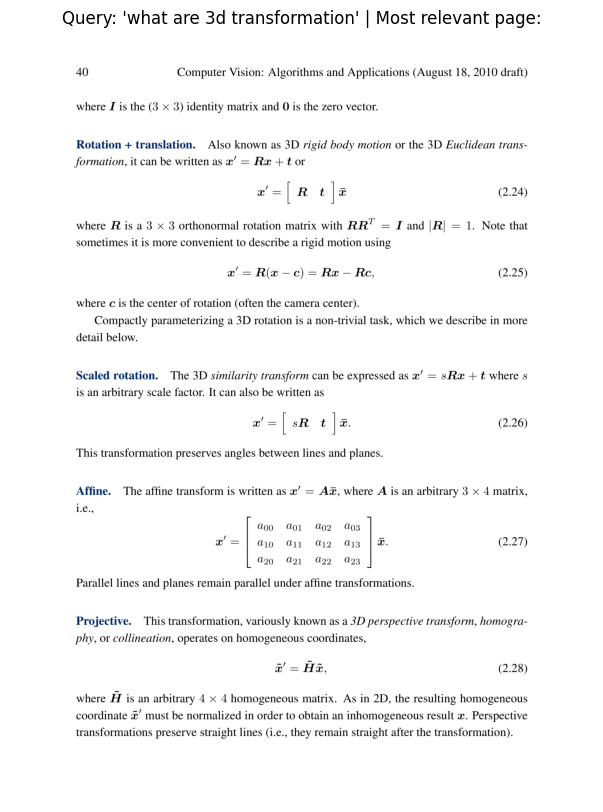

In [40]:
import pymupdf # pymupdf library

# open PDF and load target
pdf_path="Computer-Vision-Algorithm-and-Applications.pdf"

doc = pymupdf.open(pdf_path)
page = doc.load_page(39 + 22) # note: page numbers of our PDF start 41+

# Get the image of the page
img = page.get_pixmap(dpi=300)

# Save image (optional)
# img.save("output_filename.png")
doc.close()

# Convert the pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis("off")
plt.show()

In [41]:
def retrieve_relevant_resources(query: str,
                                embeddings:torch.tensor,
                                model:SentenceTransformer=embedding_model,
                                n_resources_to_return: int=10,
                                print_time:bool=True):
    query_embedding=embedding_model.encode(query,convert_to_tensor=True)

    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on ({len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores,
                                 k=n_resources_to_return)

    return scores,indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=10):

    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings,
                                                  n_resources_to_return=n_resources_to_return)

    # Loop through zipped together scores and indices from torch.topk
    for score, idx in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print("Text:")
        print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[idx]['page_number']}")
        print("\n")






In [42]:
print_top_results_and_scores(query=query, embeddings=embeddings)

[INFO] Time taken to get scores on (2183 embeddings: 0.00008 seconds.
Score: 0.6584
Text:
40 Computer Vision: Algorithms and Applications (August 18, 2010 draft) where I
is the (3 × 3) identity matrix and 0 is the zero vector. Rotation + translation.
Also known as 3D rigid body motion or the 3D Euclidean trans- formation, it can
be written as x′ = Rx + t or x′ = h R t i ¯x (2.24) where R is a 3 × 3
orthonormal rotation matrix with RRT = I and |R| = 1. Note that sometimes it is
more convenient to describe a rigid motion using x′ = R(x −c) = Rx −Rc, (2.25)
where c is the center of rotation (often the camera center). Compactly
parameterizing a 3D rotation is a non-trivial task, which we describe in more
detail below. Scaled rotation. The 3D similarity transform can be expressed as
x′ = sRx + t where s is an arbitrary scale factor. It can also be written as x′
= h sR t i ¯x. (2.26) This transformation preserves angles between lines and
planes. Afﬁne.
Page number: 39


Score: 0.6530
Text:
A

In [43]:
# Get GPU available memory
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 15 GB


In [44]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


In [54]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 840.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [45]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `Rag_token` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `Rag_toke

In [45]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

# 1. Create a quantization config
# Note: requires !pip install bitsandbytes accelerate
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: flash attention 2 = faster attention mechanism
# Flash Attention 2 requires a GPU with a compute capability score of 8.0+ (Ampere, Ada Lovelace, Hopper and above): https://developer.nvidia.com/cuda-gpus
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
    attn_implementation = "flash_attention_2"
else:
    attn_implementation = "sdpa" # scaled dot product attention
print(f"Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use
# model_id = "google/gemma-7b-it"
model_id = model_id

# 3. Instantiate tokenizer (tokenizer turns text into tokens)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16,
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False, # use as much memory as we can
                                                 attn_implementation=attn_implementation)

if not use_quantization_config:
    llm_model.to("cuda")

Using attention implementation: sdpa


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [46]:
def get_model_mem_size(model: torch.nn.Module):
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate model sizes
    model_mem_bytes = mem_params + mem_buffers
    model_mem_mb = model_mem_bytes / (1024**2)
    model_mem_gb = model_mem_bytes / (1024**3)

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 5012345344, 'model_mem_mb': 4780.15, 'model_mem_gb': 4.67}

In [47]:
input_text = "What are the macronutrients and what are their functions in the body?"
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False,
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Input text:
What are the macronutrients and what are their functions in the body?

Prompt (formatted):
<bos><start_of_turn>user
What are the macronutrients and what are their functions in the body?<end_of_turn>
<start_of_turn>model



In [48]:
tokenizer

GemmaTokenizerFast(name_or_path='google/gemma-2b-it', vocab_size=256000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<bos>', 'eos_token': '<eos>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'additional_special_tokens': ['<start_of_turn>', '<end_of_turn>']}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<eos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<bos>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("<mask>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=False),
	5: AddedToken("<2mass>", rstrip=False, lstrip=False, single_wor

In [49]:
%%time

# Tokenize the input text (turn it into numbers) and send it to the GPU
input_ids = tokenizer(prompt,
                      return_tensors="pt").to("cuda")

# Generate outputs from local LLM
outputs = llm_model.generate(**input_ids,
                             max_new_tokens=256)
print(f"Model output (tokens):\n{outputs[0]}\n")

Model output (tokens):
tensor([     2,      2,    106,   1645,    108,   1841,    708,    573, 186809,
        184592,    578,   1212,    708,   1024,   7257,    575,    573,   2971,
        235336,    107,    108,    106,   2516,    108,  21404, 235269,   1517,
        235303, 235256,    476,  25497,    576,    573, 186809, 184592,    578,
          1024,   7257,    575,    573,   2971, 235292,    109,    688,  12298,
          1695, 184592,  66058,    109, 235287,   5231, 156615,  56227,  66058,
           108,    141, 235287,  34428,   4134,    604,    573,   2971, 235303,
        235256,   5999,    578,  29703, 235265,    108,    141, 235287, 110165,
         56227,    708,    573,   2971, 235303, 235256,   1872,   4303,    576,
          4134, 235269,   5199,   2290,   6915,   5640, 235265,    108,    141,
        235287,  25280,  72780,   3707,   2343,   2127, 235269,  38317, 235269,
           578,  84475, 235265,    108, 235287,   5231,  49471,  66058,    108,
           141, 2

In [50]:
# Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<bos><bos><start_of_turn>user
What are the macronutrients and what are their functions in the body?<end_of_turn>
<start_of_turn>model
Sure, here's a breakdown of the macronutrients and their functions in the body:

**Macronutrients:**

* **Carbohydrates:**
    * Provide energy for the body's cells and tissues.
    * Carbohydrates are the body's main source of energy, especially during physical activity.
    * Complex carbohydrates include starches, fibers, and sugars.
* **Protein:**
    * Builds and repairs tissues, enzymes, and hormones.
    * Protein is essential for muscle growth and repair, as well as for the production of antibodies.
    * Complete proteins include animal products, legumes, nuts, and seeds.
* **Fat:**
    * Provides energy, insulation, and the production of hormones.
    * Healthy fats include olive oil, avocado, nuts, and seeds.
    * Trans fats can raise cholesterol levels and increase the risk of heart disease.

**Functions of Macronutri

In [51]:
# Nutrition-style questions generated with GPT4
cv_questions = [

    "How do object detection and image segmentation differ in computer vision tasks?",
    "Describe the process of image classification using deep learning models.",
    "What role does data augmentation play in training computer vision models? Name five common augmentation techniques.",
    "Explain the concept of feature extraction and its importance in image recognition."
]
query_list = cv_questions


In [52]:
import random

query = random.choice(query_list)
print(f"Query: {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

Query: What role does data augmentation play in training computer vision models? Name five common augmentation techniques.
[INFO] Time taken to get scores on (2183 embeddings: 0.00008 seconds.


(tensor([0.5184, 0.5090, 0.4877, 0.4864, 0.4851, 0.4845, 0.4760, 0.4735, 0.4729,
         0.4724], device='cuda:0'),
 tensor([ 225, 1810, 1919, 2181, 2171, 1629, 1961,  228, 1132, 2165],
        device='cuda:0'))

In [53]:
def prompt_formatter(query: str,
                     context_items: list[dict]) -> str:
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

\nExample 1:
Query: What are convolutional neural networks (CNNs), and how do they work in image processing?
Answer: Convolutional Neural Networks (CNNs) are a type of deep learning model specifically designed for image processing tasks. They use layers of convolutional filters to detect spatial features such as edges, textures, and patterns. A CNN consists of multiple layers, including convolutional layers, activation functions (like ReLU), pooling layers for downsampling, and fully connected layers for classification. The model learns hierarchical features—low-level features like edges in early layers and high-level features like objects in later layers. CNNs are widely used in tasks like image classification, object detection, and image segmentation.

\nExample 2:
Query: How do object detection and image segmentation differ in computer vision tasks?
Answer: Object detection and image segmentation are two distinct tasks in computer vision. Object detection identifies and localizes objects within an image by drawing bounding boxes around them. It answers **"What objects are present?"** and **"Where are they?"** in the image. In contrast, image segmentation goes a step further by classifying each pixel in the image, dividing it into meaningful regions. It can be either **semantic segmentation** (classifying pixels into object categories) or **instance segmentation** (distinguishing individual objects of the same class). While object detection is useful in applications like autonomous driving and security surveillance, segmentation is crucial in medical imaging and scene understanding.

\nExample 3:
Query: What role does data augmentation play in training computer vision models? Name five common augmentation techniques.
Answer: Data augmentation is a technique used to artificially increase the size of a training dataset by applying transformations to existing images. This helps improve a model's generalization ability and reduces overfitting. Common augmentation techniques include **rotation**, **flipping**, **cropping**, **brightness adjustment**, and **Gaussian noise addition**. These transformations create variations in the dataset, making the model more robust to real-world scenarios. For instance, rotating an image by 10 degrees ensures that the model learns invariant features rather than memorizing fixed patterns.

\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""
    base_prompt = base_prompt.format(context=context,
                                     query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
         "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                           tokenize=False,
                                           add_generation_prompt=True)

    return prompt

query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)

# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format our prompt
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: What role does data augmentation play in training computer vision models? Name five common augmentation techniques.
[INFO] Time taken to get scores on (2183 embeddings: 0.00008 seconds.
<bos><start_of_turn>user
Based on the following context items, please answer the query.  
Give yourself room to think by extracting relevant passages from the context before answering the query.  
Don't return the thinking, only return the answer.  
Make sure your answers are as explanatory as possible.  
Use the following examples as reference for the ideal answer style.  


Example 1:  
Query: What are convolutional neural networks (CNNs), and how do they work in image processing?  
Answer: Convolutional Neural Networks (CNNs) are a type of deep learning model specifically designed for image processing tasks. They use layers of convolutional filters to detect spatial features such as edges, textures, and patterns. A CNN consists of multiple layers, including convolutional layers, activation fun

In [54]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate an output of tokens
outputs = llm_model.generate(**input_ids,
                             temperature=0.7, # from 0 to 1 and the lower the value, the more deterministic the text, the higher the value, the more creative
                             do_sample=True, # whether or not to use sampling, https://huyenchip.com/2024/01/16/sampling.html
                             max_new_tokens=256)

# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])
print(f"Query: {query}")
print(f"RAG answer:\m{output_text.replace(prompt, '')}")

Query: What role does data augmentation play in training computer vision models? Name five common augmentation techniques.
RAG answer:\m<bos>The passage describes the role of data augmentation in training computer vision models and provides five common augmentation techniques to improve the model's generalization ability and reduce overfitting.<eos>
CPU times: user 2.14 s, sys: 15 ms, total: 2.16 s
Wall time: 2.5 s


In [55]:
def ask(query: str,
        temperature: float=0.7,
        max_new_tokens:int=256,
        format_answer_text=True,
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    # RETRIEVAL
    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)

    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu()

    # AUGMENTATION
    # Create the prompt and format it with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)

    # GENERATION
    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)

    # Decode the tokens into text
    output_text = tokenizer.decode(outputs[0])

    # Format the answer
    if format_answer_text:
        # Replace prompt and special tokens
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "")

    # Only return the answer without context items
    if return_answer_only:
        return output_text

    return output_text, context_items

In [56]:
query = random.choice(query_list)
print(f"Query: {query}")
ask(query=query,
    temperature=0.2,
    return_answer_only=True)

Query: How do object detection and image segmentation differ in computer vision tasks?
[INFO] Time taken to get scores on (2183 embeddings: 0.00014 seconds.


"Sure, here's the answer to the user's query:\n\nObject detection and image segmentation are two distinct tasks in computer vision tasks. Object detection is the task of identifying and localizing objects in an image, while image segmentation is the task of dividing an image into its different object parts."

In [59]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [58]:
import gradio as gr



def chatbot(query):
    return ask(query=query,
      temperature=0.2,
      return_answer_only=True)

iface = gr.Interface(fn=chatbot, inputs="text", outputs="text", title="RAG Chatbot")
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e31a5fbae3453a5888.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
